In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nbconvert in c:\users\user\anaconda3\lib\site-packages (7.16.4)



In [6]:
import pandas as pd # pandas pd로 줄임 및 import
import matplotlib.pyplot as plt # matplotlib.pyplot plt로 줄임 및 import

In [106]:
import os 
os.getcwd() # 현재 작업 디렉토리 반환

'C:\\Users\\user\\3-1 딥러닝 수업'

In [107]:
df = pd.read_csv("native_plant_richness.txt", sep = '\t') 

현재 작업 디렉터리에 있는 해당 파일을 pandas.DataFrame객체로 반환.
각 열은 헤더에 적힌 변수명으로 설정, 각 행은 해당 변수의 관측값

In [109]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ntv_rich  22 non-null     float64
 1   area      22 non-null     float64
dtypes: float64(2)
memory usage: 484.0 bytes
None


info() : 데이터프레임의 전체 구조 요약, column 목록과 결측치 여부를 파악할 수 있다.

In [111]:
print(df.head())

   ntv_rich      area
0  1.897627  1.602060
1  1.633468  0.477121
2  2.597695  3.432488
3  2.238046  1.785330
4  2.712650  3.075547


head(n) : 0행 부터 n개 행으로 구성된 새로운 DataFrame 반환

In [28]:
x = df['area']
y = df['ntv_rich']

print(df.ntv_rich.head())
print(df['ntv_rich'].head())

0    1.897627
1    1.633468
2    2.597695
3    2.238046
4    2.712650
Name: ntv_rich, dtype: float64
0    1.897627
1    1.633468
2    2.597695
3    2.238046
4    2.712650
Name: ntv_rich, dtype: float64


df['ntv_rich'] 
사전 스타일의 인덱싱으로, 언제나 문자열 키로 컬럼 조회.
컬럼명이 문자열인 한 해당 열을 직접 꺼내온다.
항상 안전하게 동작

df.ntv_rich
속성 스타일 접근.
내부적으로 __getattr__를 통해 컬럼명이 클래스 속성(메서드나 프로퍼티)이 아니면, df['ntv_rich']로 위임된다.
다만, 제약되는 경우가 몇 가지 있다.
1. 컬럼명이 유효한 식별자가 아닐 때
2. 컬럼명이 DataFrame 메서드, 속성과 충돌할 때

웬만하면 df['ntv_rich']방식이 낫다.

In [115]:
xbar = x.mean()
ybar = y.mean() #각각의 표본평균
s_xy = ((x-xbar)*(y-ybar)).sum() # x와 y의 공분산
s_xx = ((x-xbar)**2).sum() # x의 분산
a = s_xy/s_xx # 최소제곱 추정의 beta_1 추정 공식
b = ybar-a*xbar # beta_0 추정 공식
print('a = ', round(a,4)) 
print('b = ', round(b,4)) # 최종적으로 계산된 기울기 a와 절편 b를 소수점 넷째 자리까지 반올림

a =  0.3557
b =  1.336


In [116]:
x_0 = 2
predicted = a*x_0 + b # 주어진 데이터에 대한 최적(least-Squares) 회귀선
print('prediction = ', round(predicted,4))

prediction =  2.0475


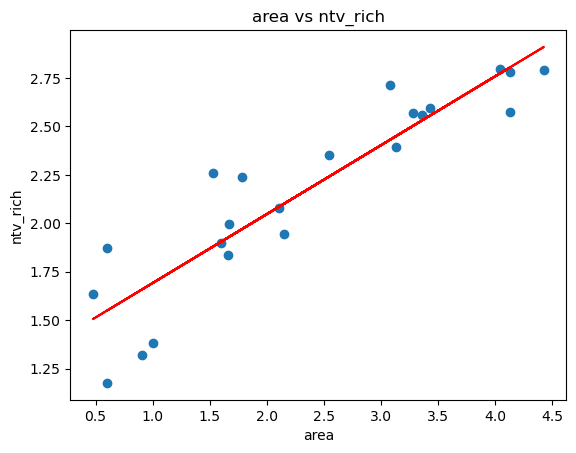

In [117]:
plt.title('area vs ntv_rich') # 제목 붙기
plt.scatter(df['area'],df['ntv_rich']) # 산점도(scatter plot) 그기
plt.plot(df['area'],a*df['area'] +b, color = 'red') # 이전 회귀직선 그리기
plt.xlabel('area')
plt.ylabel('ntv_rich') # x,y축에 라벨 붙이기
plt.show() # 위 요소들을 화면에 렌더

plt.title('area vs ntv_rich')

 - statsmodels 패키지를 사용한 구현

In [8]:
from statsmodels.formula.api import ols

statsmodels.formula.api는 R의 formula 문법 사용해서 통계 모델을 간결하게 정의하고 적합할 수 있게 해 주는 Statsmodels 라이브러리의 서브모듈.

In [11]:
df = pd.read_csv("native_plant_richness.txt", sep = '\t')

현재 작업 디렉터리에 있는 해당 파일을 pandas.DataFrame객체로 반환.
각 열은 헤더에 적힌 변수명으로 설정, 각 행은 해당 변수의 관측값

In [14]:
model = ols('ntv_rich ~ area', data = df)

1. ols 선형회귀모델 생성기 호출
2. ntv_rich이 종속 변수, area이 독립 변수
3. DataFrame형인 df에서 ntv_rich와 area 두 컬럼을 찾아 설계 행렬과 종속 변수 벡터로 변환


In [17]:
result = model.fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               ntv_rich   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     96.13
Date:                Thu, 01 May 2025   Prob (F-statistic):           4.40e-09
Time:                        23:10:08   Log-Likelihood:                 4.0471
No. Observations:                  22   AIC:                            -4.094
Df Residuals:                      20   BIC:                            -1.912
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3360      0.096     13.869      0.0

최소제곱 회귀분석 수행 -> 추정된 계수와 통계량 담은 RegressionResults 객체 반환
1. 절편(const), 기울기(area) 각각의 행을 보면
   coef가 실추정치, p>|t| < 0.05이면 보통 통계적으로 유의.
2. R-squared로 모델 설명력 파악
3. F-statistic과 그 p-값으로 "모델 전체가 유의한가" 확인.





In [128]:
result.params

Intercept    1.336048
area         0.355739
dtype: float64

모수 추정 결과

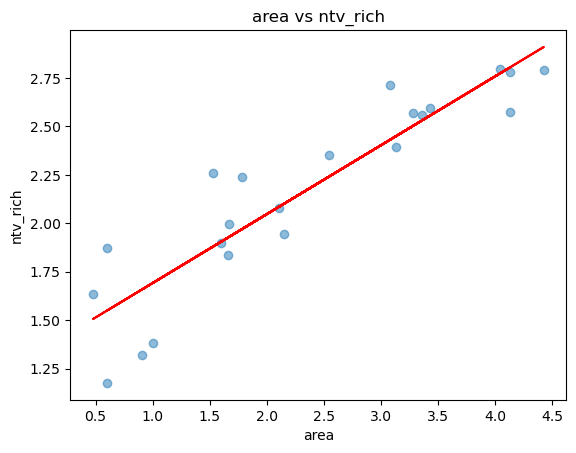

In [30]:
plt.title('area vs ntv_rich')
y = df.ntv_rich
x = df.area
plt.scatter(x, y, alpha = 0.5)
plt.plot(x, result.params.iloc[1]*df['area']+result.params.iloc[0], color = 'red')
plt.xlabel('area')
plt.ylabel('ntv_rich')
plt.show()

5번째 줄 원본 코드 :
plt.plot(x, result.params[1]*df['area']+result.params[0], color = 'red')

이건 정수 인덱스 접근 방식인데 미래 버전에서는 레이블 접근 방식만 허용하도록 바뀐다고 한다.
똑같이 정수 인덱스(위치 기반) 접근 사용하려면 iloc사용하고, 레이블 기반 접근은 .loc 이나 ''로 이름을 직접 지정해야 한다.


In [132]:
import sys
!{sys.executable} -m pip install torch torchvision torchaudio


! : 이 셀을 쉘(터미널) 명령으로 실행
-m pip install : 그 파이썬 환경의 pip 모듈 사용, 이하 패키지 설치

 - 파이토치 이용한 회귀계수 직접 구현

In [1]:
import sys
!{sys.executable} -m pip install --upgrade --force-reinstall torch


  Using cached torch-2.7.0-cp312-cp312-win_amd64.whl.metadata (29 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached setuptools-80.1.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached torch-2.7.0-cp312-cp312-win_amd64.whl (212.5 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Using cached jinja2-3.1.6-py3-none-any.wh

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2024.6.1 requires fsspec==2024.6.1.*, but you have fsspec 2025.3.2 which is incompatible.


In [22]:
import torch
print(torch.__file__)         # 어떤 파일이 임포트됐는지 확인
print(torch.__version__)      # 버전 확인
print(torch.cuda.is_available())  # CUDA 사용 가능 여부


C:\Users\user\anaconda3\Lib\site-packages\torch\__init__.py
2.7.0+cpu
False


In [32]:
xbar = x.mean()
ybar = y.mean() #각각의 표본평균
s_xy = ((x-xbar)*(y-ybar)).sum() # x와 y의 공분산
s_xx = ((x-xbar)**2).sum() # x의 분산
a = s_xy/s_xx # 최소제곱 추정의 beta_1 추정 공식
b = ybar-a*xbar # beta_0 추정 공식
print('slope = ', a)
print('intercept = ', b)

slope =  0.3557393592583522
intercept =  1.3360482821493544


AttributeError: 'Series' object has no attribute 'cpu'

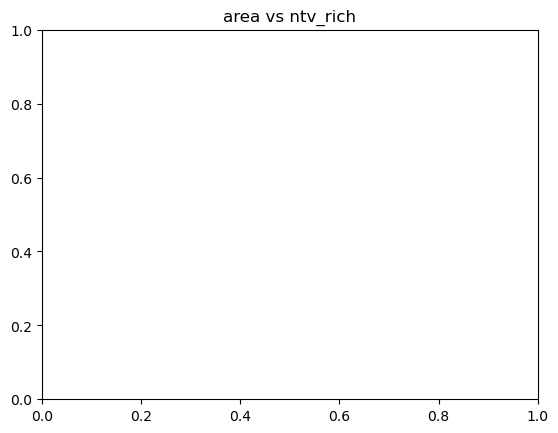

In [34]:
plt.title('area vs ntv_rich')
plt.plot(x.cpu().numpy(), y.cpu().numpy(),'o')
plt.plot(x.cpu().numpy(), a.cpu().numpy()*x.cpu().numpy() + b.cpu().numpy())
plt.xlabel('area')
plt.ylabel('ntv_rich')
plt.show()

 - 머신러닝 기반 회귀분석 파이토치 구현

In [24]:
import torch
w = torch.tensor(2.0, requires_grad = True)

x = w + 2
y = x**2
z = 3*y + 5
print('w.grad_fn =', w.grad_fn)
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)
print('z =', z, ', requires_grad =', z.requires_grad)

w.grad_fn = None
x = tensor(4., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(16., grad_fn=<PowBackward0>) , requires_grad = True
z = tensor(53., grad_fn=<AddBackward0>) , requires_grad = True


w 텐서는 “학습 가능한 파라미터”처럼 다뤄지며, 이후 이 값을 사용해 만든 연산에 대해 역전파(gradient 계산)가 가능.

텐서 x, y, z는 requires_grad=True를 물려받고, 내부적으로 AddBackward0라는 함수(그리고 그 정보)가 연결.

w.grad_fn = None : w는 leaf tensor라서 뒤의 연산 함수가 없고, 직접 gradient 저장만.
x, y, z 모두 requires_grad=True : 그래프 상의 중간/ 최종 노드들이기 때문에. 이들을 기준으로 역전파를 타고 w.grad를 계산할 수 있다.

z.backward() 호출시 chain rule을 사용해 계산한 값을 w.grad에 저장.

In [22]:
w = torch.tensor(2.0, requires_grad = True)

for i in range(10):
  x = w + 2
  y = x**2
  z = 3*y + 5
  z.backward()
print(f'z를 w로 미분한 값: {w.grad}')

z를 w로 미분한 값: 240.0


호출당 24가 w.grad에 쌓여서 24*10= 240

In [36]:
a = torch.tensor(2., requires_grad = True)
b = torch.tensor(3., requires_grad = True)
x = a+b
y = a*b
print('Before detach()')
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

x = x.detach()
y = y.detach()
print('After detach()')
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

Before detach()
x = tensor(5., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(6., grad_fn=<MulBackward0>) , requires_grad = True
After detach()
x = tensor(5.) , requires_grad = False
y = tensor(6.) , requires_grad = False


detach 이전: x, y 모두 연산 이력이 기록되어 있어 requires_grad=True이고, .grad_fn이 존재.

detach 호출 후: 새로운 텐서가 생성되어 requires_grad=False, grad_fn=None이 됨.

주로 모델의 일부 출력을 고정(frozen)하고 싶을 때,

불필요한 그래프 빌드를 방지해 메모리·연산 효율을 높이고 싶을 때,

예컨대 손실 함수 계산 시 gradient flow를 일부 차단하고 싶을 때 유용.

In [38]:
a = torch.tensor(2., requires_grad = True)
b = torch.tensor(3., requires_grad = True)
x = a+b
y = a*b
print('Before torch.no_grad()')
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

with torch.no_grad():
  x = a+b
  y = a*b
print('After torch.no_grad()') 
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

Before torch.no_grad()
x = tensor(5., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(6., grad_fn=<MulBackward0>) , requires_grad = True
After torch.no_grad()
x = tensor(5.) , requires_grad = False
y = tensor(6.) , requires_grad = False


with torch.no_grad(): 블록 안에서는 모든 연산에 대해 자동 미분 그래프 생성을 비활성화

훈련 과정 중 파라미터 업데이트나 평가 단계에서는 모델의 순전파 같은 그래디언트가 필요 없는 연산이 많다.

이 때, torch.no_grad()를 쓰면 불필요한 그래디언트 저장을 막아 메모리 사용량을 줄이고 연산 속도를 높일 수 있다.

In [40]:
w = torch.tensor(2.0, requires_grad = True)

x = w+2
y = x**2
y = y.detach()
z = 3*y + 5
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)
print('z =', z, ', requires_grad =', z.requires_grad)
z.backward()
print(f'z를 w로 미분한 값 : {w.grad}')

x = tensor(4., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(16.) , requires_grad = False
z = tensor(53.) , requires_grad = False


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

y.detach()로 인해 y뿐만 아니라 이후의 z 텐서로 수행되는 연산은 자동 미분 그래프에 기록되지 않음.
detach()로 생성된 텐서는 원본 텐서와 같은 메모리 버퍼를 공유.

In [42]:

w = torch.tensor(2.0, requires_grad = True)

x = w+2
with torch.no_grad():
  y = x**2
  z = 3*y + 5
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)
print('z =', z, ', requires_grad =', z.requires_grad)
z.backward()
print(f'z를 w로 미분한 값 : {w.grad}')

x = tensor(4., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(16.) , requires_grad = False
z = tensor(53.) , requires_grad = False


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

컨텍스트 블록 안 y,z 텐서에 대하여 그래프 연결 해제. 
따라서 z.backward() 연산 수행 불가.

 - 파이토치 미분값 초기화 방법

In [44]:
x = torch.tensor(2.0, requires_grad = True)

n_epochs = 10
for epoch in range(n_epochs + 1):

  y = 2*x
  y.backward()
  print('dy/dx = {}'.format(x.grad))


dy/dx = 2.0
dy/dx = 4.0
dy/dx = 6.0
dy/dx = 8.0
dy/dx = 10.0
dy/dx = 12.0
dy/dx = 14.0
dy/dx = 16.0
dy/dx = 18.0
dy/dx = 20.0
dy/dx = 22.0


1 epoch마다 2씩 누적됨.

In [46]:
x = torch.tensor(2.0, requires_grad = True)

n_epochs = 10
for epoch in range(n_epochs + 1):

  y = 2*x
  y.backward()
  print('dy/dx = {}'.format(x.grad))
  x.grad.zero_()

dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0


x.grad.zero_()로 인해 매 epoch마다 x.grad텐서를 0으로 초기화
-> gradient가 누적되지 않고 각 epoch의 2만큼만 매번 출력.

In [49]:
#Loss function: 파이토치 자동미분과 직접미분 값 비교

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# 모델 초기화
a = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

lr = 1e-1
n_epochs = 3
for epoch in range(n_epochs):
  yhat = a * x_train + b # 선형모델로 추정
  error = y_train - yhat
  loss = (error**2).mean() # 오차와 손실 계산 
  loss.backward() # 자동 미분으로 기울기 계산
  a_grad = -2 * (x_train*error).mean() 
  b_grad = -2 * error.mean() # 직접 미분으로 기울기 계산
  print('epoch =', epoch)
  print('직접미분 a_grad =', a_grad)
  print('직접미분 b_grad =', b_grad)
  with torch.no_grad(): # 파라미터 업데이트
    a -= lr * a.grad
    b -= lr * b.grad

  print('자동미분 a.grad =', a.grad) # autograd가 계산해 놓은 기울기 출력
  print('자동미분 b.grad =', b.grad)

epoch = 0
직접미분 a_grad = tensor(-18.6667, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(-8., grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-18.6667])
자동미분 b.grad = tensor([-8.])
epoch = 1
직접미분 a_grad = tensor(1.9556, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(1.0667, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-16.7111])
자동미분 b.grad = tensor([-6.9333])
epoch = 2
직접미분 a_grad = tensor(20.3259, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(9.1378, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([3.6148])
자동미분 b.grad = tensor([2.2044])


자동미분과 직접미분 값이 일치하지 않는 문제가 생김.
-> 자동미분값인 a.grad(), b.grad()가 초기화 되지 않고, 각 epoch마다 미분값이 계속 누적되서 출력되므로.

In [52]:
#Loss function: 파이토치 자동미분과 직접미분 값 비교

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# 모델 초기화
a = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

lr = 1e-1
n_epochs = 3
for epoch in range(n_epochs):
  yhat = a * x_train + b
  error = y_train - yhat
  loss = (error**2).mean()
  loss.backward()
  a_grad = -2 * (x_train*error).mean()
  b_grad = -2 * error.mean()
  print('epoch =', epoch)
  print('직접미분 a_grad =', a_grad)
  print('직접미분 b_grad =', b_grad)
  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad

  print('자동미분 a.grad =', a.grad)
  print('자동미분 b.grad =', b.grad)
  
  #zero 사용
  a.grad.zero_()
  b.grad.zero_()

epoch = 0
직접미분 a_grad = tensor(-18.6667, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(-8., grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-18.6667])
자동미분 b.grad = tensor([-8.])
epoch = 1
직접미분 a_grad = tensor(1.9556, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(1.0667, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([1.9556])
자동미분 b.grad = tensor([1.0667])
epoch = 2
직접미분 a_grad = tensor(-0.2963, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(0.0711, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-0.2963])
자동미분 b.grad = tensor([0.0711])


zero를 사용함으로써 위에 언급된 누적효과를 제거하였다.
따라서, 직접미분과 자동미분의 값이 일치함

In [55]:
import torch.optim as optim

x_tensor = torch.FloatTensor([[1],[2],[3]])
y_tensor = torch.FloatTensor([[2],[4],[6]])

a = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

lr = 0.1
optimizer = optim.SGD([a,b], lr = lr)

n_epochs = 100
for epoch in range(n_epochs):
  yhat = a + b * x_tensor # 순전파
  error = y_tensor - yhat
  loss = (error**2).mean()
  loss.backward() # 역전파 

  with torch.no_grad(): # 파라미터 업데이트
    a -= lr * a.grad
    b -= lr * b.grad
  optimizer.zero_grad() # 옵티마이저 초기화, 스텝
  optimizer.step()

  if epoch % 10 ==0: # 진행 출력
    print('epoch = {:3d}/{} a = {:.3f}, b = {:.3f}, Loss ={:.5f}'.format(
        epoch, n_epochs, a.item(), b.item(), loss.item()
    ))

epoch =   0/100 a = 0.800, b = 1.867, Loss =18.66667
epoch =  10/100 a = 0.564, b = 1.752, Loss =0.04792
epoch =  20/100 a = 0.442, b = 1.805, Loss =0.02945
epoch =  30/100 a = 0.347, b = 1.847, Loss =0.01810
epoch =  40/100 a = 0.272, b = 1.880, Loss =0.01113
epoch =  50/100 a = 0.213, b = 1.906, Loss =0.00684
epoch =  60/100 a = 0.167, b = 1.927, Loss =0.00420
epoch =  70/100 a = 0.131, b = 1.942, Loss =0.00258
epoch =  80/100 a = 0.103, b = 1.955, Loss =0.00159
epoch =  90/100 a = 0.081, b = 1.965, Loss =0.00098


순전파, 역전파 수행 후 with torch.no_grad()안에서 .grad값을 이용해 수동으로 경사하강 수행, 이어서
optimizer.zero_grad()로 모든 파라미터의 .grad()를 0으로 초기화, optimizer.step()으로 옵티마이저가 다시 한 번 a,b를 업데이트.

이후 epoch이 10의 배수일 때만 결과 출력.

예제 3.2) 파이썬 scikit-learn을 이용한 머신러닝

In [62]:
import numpy as np
x = [1,2,3,4,5]
y = [0, 1.1, 1.8, 3.1, 4.5]
X = np.array(x).reshape(-1,1)
Y = np.array(y)

Python 리스트 형태로 입력 변수 x와 출력값 y 정의.
.reshape(-1,1) : 인자에 -1 할당 -> 행 개수를 나머지 차원의 크기와 전체 원소 개수를 보고 정하라는 의미 
Y = np.array(y) : 내부의 0을 0.으로 만들기 위한 처리

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

1. LinearRegression 클래스 불러오기, 해당 클래스는 다중 선형 회귀 지원

2. 선형 회귀 모델의 인스턴스 생성

3. 훈련 데이터와 타깃을 넘겨 주고 내부적으로는 최소제곱법을 이용해 최적 계수와 절편 계산.

In [67]:
print('intercept =', round(model.intercept_,4))
print('slope =', model.coef_)

intercept = -1.2
slope = [1.1]


내부적으로 계산된 최적 계수와 절편 출력. 절편은 소수점 4자리까지 반올림.

In [70]:
y_pred = model.predict(X)
print('prediction = ', y_pred)

prediction =  [-0.1  1.   2.1  3.2  4.3]


선형회귀모델에 입력 행렬 x 넣고, 계수와 절편 이용해서 예측값 계산.

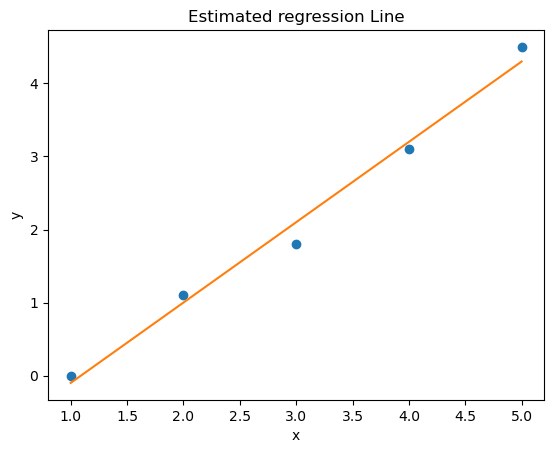

In [73]:
plt.title('Estimated regression Line')
plt.plot(x,y,'o')
plt.plot(x,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

1. 그래프 상단에 제목 붙임
2. 원본 관측값을 원 모양 마커로 표시
3. 예측값을 선 형태로 표시
4. x축에 x, y축에 y 이름 붙이기
5. 그래프 렌더링해서 보여주기

예제 3.2) 파이토치 이용 머신러닝

In [77]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.tensor([1, 2, 3, 4, 5]).to(device)
y = torch.tensor([0, 1.1, 1.8, 3.1, 4.5]).to(device)

torch.manual_seed(1)
a = torch.randn(1, device = device, requires_grad = True)
b = torch.randn(1, device = device, requires_grad = True)

def model(x):
  return a * x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
for epoch in range(epochs):
  yhat = model(x).to(device)

  loss = (yhat - y).pow(2).mean()
  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

  if (epoch + 1) % 100 == 0:
    print('epoch=',epoch+1,'a=',a.detach().cpu().numpy(), 'b=',b.detach().cpu().numpy(),
          'loss=',loss.detach().cpu().numpy())

epoch= 100 a= [0.80877024] b= [-0.1485682] loss= 0.23458958
epoch= 200 a= [0.89243525] b= [-0.4506253] loss= 0.13490887
epoch= 300 a= [0.9520648] b= [-0.6659069] loss= 0.08427431
epoch= 400 a= [0.9945639] b= [-0.8193421] loss= 0.058553673
epoch= 500 a= [1.0248537] b= [-0.92869824] loss= 0.045488335
epoch= 600 a= [1.0464419] b= [-1.0066384] loss= 0.03885163
epoch= 700 a= [1.0618281] b= [-1.0621874] loss= 0.03548041
epoch= 800 a= [1.0727941] b= [-1.1017781] loss= 0.03376796
epoch= 900 a= [1.08061] b= [-1.1299958] loss= 0.032898042
epoch= 1000 a= [1.0861804] b= [-1.150107] loss= 0.032456223
epoch= 1100 a= [1.0901505] b= [-1.1644405] loss= 0.032231748
epoch= 1200 a= [1.0929803] b= [-1.1746565] loss= 0.03211769
epoch= 1300 a= [1.0949969] b= [-1.1819377] loss= 0.032059755
epoch= 1400 a= [1.0964342] b= [-1.1871265] loss= 0.032030366
epoch= 1500 a= [1.0974585] b= [-1.1908245] loss= 0.03201545
epoch= 1600 a= [1.0981885] b= [-1.1934601] loss= 0.032007847
epoch= 1700 a= [1.0987087] b= [-1.1953384

1. cuda디바이스 선택 아니면 cpu 선택
2. 데이터 텐서를 cuda(아님 cpu)로 옮기기.
3. 난수 생성 시드 고정시켜 항상 같은 "난수" 시퀀스를 생성.
   a,b는 정규분포에서 뽑은 랜덤 스칼라 텐서
4. 모델 정의
5. 옵티마이저 설정 // 학습률 0.01로 설정
6. 에폭 수 정의
   순전파 -> 손실 계산 -> 역전파 -> 파라미터 업데이트 -> 그래디언트 초기화 -> 100에폭마 중간 출력.

a와 b가 실제 데이터(x,y)에 맞춰 점점 더 최적화되고, loss가 줄어드는 것을 확인할 수 있다.

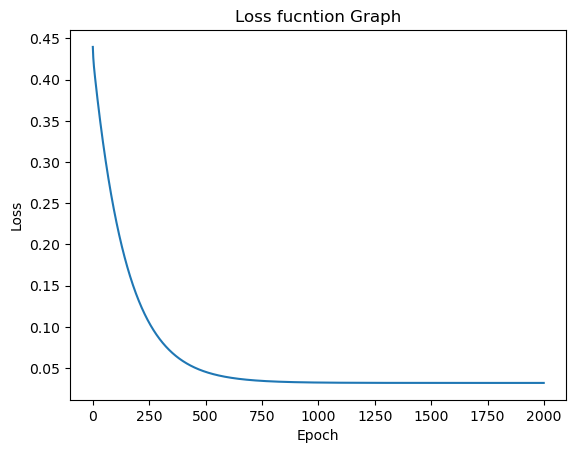

In [80]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.tensor([1, 2, 3, 4, 5]).to(device)
y = torch.tensor([0, 1.1, 1.8, 3.1, 4.5]).to(device)

torch.manual_seed(1)
a = torch.randn(1, device = device, requires_grad = True)
b = torch.randn(1, device = device, requires_grad = True)

def model(x):
  return a * x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
loss_list = []

for epoch in range(epochs):
  yhat = model(x).to(device)
  loss = (yhat - y).pow(2).mean()
  loss.backward()
  loss_list.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()


plt.title('Loss fucntion Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(0, epochs, 1),loss_list)

1. 디바이스 설정 및 데이터 준비

2. 난수 시드 고정 및 파라미터 초기화

3. 모델 함수와 옵티마이저 준비

4. 손실 기록을 위한 리스트 초기화

5. 학습 루프에서 손실 기록

6. 학습 곡선 시각화

예제 3.3) scikit-learn

In [84]:
df = pd.read_csv('native_plant_richness.txt',sep='\t')
print(df.head())

   ntv_rich      area
0  1.897627  1.602060
1  1.633468  0.477121
2  2.597695  3.432488
3  2.238046  1.785330
4  2.712650  3.075547


데이터 불러오기 및 확인
1. pandas를 이용해 탭으로 구분된 텍스트 파일 읽어옴.
2. 상위 5개 행 출력


In [87]:
y = df['ntv_rich']
x = df['area']
print(y.shape)
print(x.shape)
X=x.values.reshape(-1,1)
print(X.shape)

(22,)
(22,)
(22, 1)


y에 목표 변수를,
x에 설명 변수를 pandas series 형태로 각각 저장.
X를 (n,1) 열 벡터로 만듦.

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)


LinearRegression()

모델 객체 만들고 최소제곱법 이용해 coefficient와 intercept 학습.

In [93]:
print('intercept:{:.4f}'.format(regressor.intercept_))
print('Coefficient:{:.4f}'.format(regressor.coef_[0]))

intercept:1.3360
Coefficient:0.3557


:.4f를 통해 소수점 넷째 자리까지 반올림해 출력

In [96]:
x_0 = 2
prediction = regressor.predict([[x_0]])
print('prediction:{:.4f}'.format(prediction[0]))

prediction:2.0475


y = W*2 + b 계산 수행

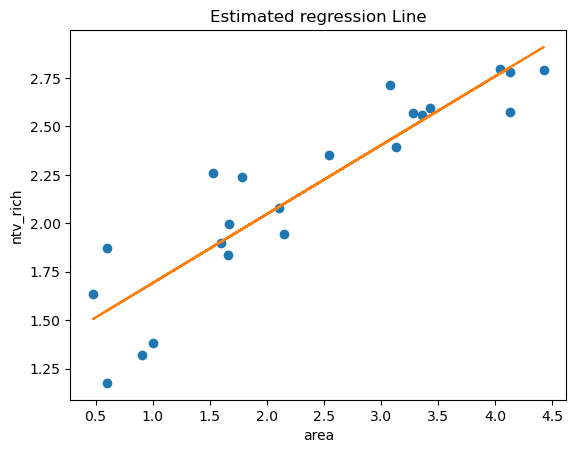

In [99]:
plt.title('Estimated regression Line')
plt.plot(X, y, 'o')
plt.plot(X, regressor.predict(X))
plt.xlabel('area')
plt.ylabel('ntv_rich')
plt.show()

산점도와 회귀선을 화면에 렌더링

예제3.3) pytorch

In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv('native_plant_richness.txt',sep='\t')

x = torch.tensor(df['area']).to(device)
y = torch.tensor(df['ntv_rich']).to(device)

a = torch.tensor(1., device = device, requires_grad = True)
b = torch.tensor(1., device = device, requires_grad = True)

def model(x):
  return a*x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
for epoch in range(epochs):
  yhat = model(x).to(device)
  loss = (yhat -y).pow(2).mean()
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch + 1) % 100 == 0:
    print('epoch=',epoch+1,'a=',a.detach().cpu().numpy(), 'b=',b.detach().cpu().numpy(),
          'loss=',loss.detach().cpu().numpy()) 

epoch= 100 a= 0.47096312 b= 0.99962604 loss= 0.06550635093768799
epoch= 200 a= 0.43353823 b= 1.1088966 loss= 0.0519147393285402
epoch= 300 a= 0.408269 b= 1.182676 loss= 0.045718412762104865
epoch= 400 a= 0.39120725 b= 1.2324917 loss= 0.042893555822939196
epoch= 500 a= 0.37968713 b= 1.2661272 loss= 0.041605722956125864
epoch= 600 a= 0.37190875 b= 1.288838 loss= 0.041018608549832615
epoch= 700 a= 0.36665684 b= 1.3041722 loss= 0.040750952614521774
epoch= 800 a= 0.36311063 b= 1.3145261 loss= 0.04062892718942061
epoch= 900 a= 0.36071637 b= 1.3215168 loss= 0.040573300898233314
epoch= 1000 a= 0.35909975 b= 1.3262368 loss= 0.040547941236051425
epoch= 1100 a= 0.3580083 b= 1.3294235 loss= 0.040536381230253514
epoch= 1200 a= 0.35727137 b= 1.3315752 loss= 0.04053111108342023
epoch= 1300 a= 0.35677376 b= 1.3330281 loss= 0.0405287081689833
epoch= 1400 a= 0.3564377 b= 1.3340093 loss= 0.04052761248296974
epoch= 1500 a= 0.35621083 b= 1.3346717 loss= 0.040527113109224425
epoch= 1600 a= 0.3560577 b= 1.33

1. 디바이스 설정
2. 데이터 로드 및 텐서화
3. 파라미터 초기화
4. 모델 함수 정의
5. 옵티마이저 설정
6. 루프
   1) 순전파
   2) 손실 계산
   3) 역전파
   4) 파라미터 업데이트
   5) 그래디언트 초기화
   6) 출력 : 100에폭마다  a, b, loss를 .detach().cpu().numpy() 형태로 추출해 프린트.
.detach()로 계산 그래프와 분리하고, .cpu()로 CPU로 이동한 뒤, .numpy()로 넘파이 배열(스칼라)로 변환하여 출력.

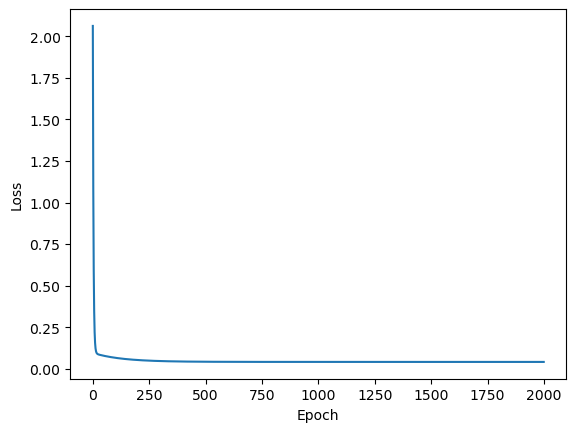

In [105]:

df = pd.read_csv('native_plant_richness.txt',sep='\t')

x = torch.tensor(df['area'])
y = torch.tensor(df['ntv_rich'])

a = torch.tensor(1., requires_grad = True)
b = torch.tensor(1., requires_grad = True)

def model(x):
  return a*x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
loss_list = []

for epoch in range(epochs):
  yhat = model(x)

  loss = (yhat -y).pow(2).mean()
  loss.backward()
  loss_list.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(0, epochs, 1),loss_list)

1. 데이터 로드
2. 입력,출력 텐서 생성
3. 파라미터 초기화
4. 모델 함수 정의
5. 옵티마이저 설정
6. 루프
   1) 순전파 : 예측값
   2) 손실 계산 : MSE
   3) 역전파 : 그래디언트 계산
   4) 손실 기록
   5) 파라미터 업데이트 & 그래디언트 초기화
   6) 학습 곡선 시각

예제 3.4) scikit-learn

In [110]:
df = pd.read_csv('student_scores.csv')
print(df.shape)

(25, 2)


데이터 로드 후 샘플 수, 컬럼 수 확인

In [113]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


.head()로 상위 5개 행 출력

In [116]:
X = df.iloc[:,:-1]
y = df.iloc[:, 1]
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


모든 행, 마지막 컬럼을 제외한 나머지(입력 특징) 선택
모든 행, 2번째 컬럼(점수)을 타깃으로 선택
둘 다 Pandas DataFrame/series 타입 확인

In [119]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:, 1].to_numpy()
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25, 1)
(25,)


NumPy 배열로 변환
scikit-learn 모델에 넘길 때는 (n_samples, n_features) 형태의 2D 배열과 1D 배열을 필요로 하기 때문

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


test_size=0.2: 전체의 20%를 테스트 세트로 분리

random_state=0: 분할 결과를 매번 동일하게 재현 가능하도록 시드 고정

결과 행렬·벡터의 크기가 (샘플 수 × 특성 수)와 (샘플 수,) 형태임을 확인

In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

LinearRegression() 객체 생성

fit()으로 최소제곱법에 따라 절편(intercept_)과 기울기(coef_) 학습

In [128]:
print('Intercept:{:.4f}'.format(model.intercept_))
print('Coefficient:{:.4f}'.format(model.coef_[0]))

Intercept:2.0182
Coefficient:9.9107


학습된 절편과 첫 번째(유일한) 특성의 계수를 소수점 넷째 자리까지 출력

In [131]:
y_pred = model.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


predict()로 테스트 입력 X_test에 대한 예측값 배열 y_pred 생성

In [134]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


Pandas DataFrame으로 실제값(Actual)과 예측값(Predicted)을 나란히 보여 줌

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

print('MAE:{:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE:{:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('RMAE:{:.4f}'.format(np.sqrt(mean_absolute_error(y_test,y_pred))))
print('R2:{:.4f}'.format(r2_score(y_test, y_pred)))

MAE:4.1839
MSE:21.5988
RMAE:2.0454
R2:0.9455


MAE (Mean Absolute Error)
평균 절대 오차: 실제값과 예측값의 차이 절댓값 평균

MSE (Mean Squared Error)
평균 제곱 오차: 오차 제곱 평균


R^2  (결정 계수)
모델이 데이터 분산을 얼마나 설명하는지, 1에 가까울수록 설명력이 좋음

In [140]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv('student_scores.csv')

X = torch.tensor(df['Hours']).to(device)
y = torch.tensor(df['Scores']).to(device)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

a = torch.tensor(1.,device=device, requires_grad=True)
b = torch.tensor(1.,device=device, requires_grad=True)

def model(x):
    return a * x + b

learning_rate = 0.01
optimizer = torch.optim.SGD([a,b],lr=learning_rate)

epochs=1000
for epoch in range(epochs):
    yhat = model(X_train).to(device)

    loss = (yhat - y_train).pow(2).mean()
    loss.backward()
    
    optimizer.step()    
    optimizer.zero_grad()    
    # Print the progress
    if (epoch+1) % 100 == 0:
        print('epoch=',epoch+1,'a=',a.detach().cpu().numpy(),'b=',b.detach().cpu().numpy(),
              'loss=',loss.detach().cpu().numpy())

epoch= 100 a= 9.870372 b= 2.2753692 loss= 30.910423487383525
epoch= 200 a= 9.88253 b= 2.1977417 loss= 30.90414959521733
epoch= 300 a= 9.891019 b= 2.1435425 loss= 30.901091230976157
epoch= 400 a= 9.896946 b= 2.105701 loss= 30.89960035343364
epoch= 500 a= 9.901083 b= 2.0792816 loss= 30.898873626889348
epoch= 600 a= 9.903973 b= 2.060835 loss= 30.898519346501235
epoch= 700 a= 9.90599 b= 2.0479565 loss= 30.89834665373413
epoch= 800 a= 9.907398 b= 2.038964 loss= 30.89826245992996
epoch= 900 a= 9.908381 b= 2.032685 loss= 30.89822141393456
epoch= 1000 a= 9.909068 b= 2.0283015 loss= 30.898201407587248


1. 디바이스 설정
2. 데이터 로드 및 텐서 변환
3. 학습용/검증용 데이터 분리
4. 모델 파라미터 초기화
5. 모델 함수 정의
6. 옵티마이저 설정
7. 학습 루프
   1) 순전파
   2) 손실 계산
   3) 역전파
   4) 파라미터 업데이트
   5) 그래디언트 초기화
   6) 모니터링
      100에폭마다 a,b,loss 값을 .detach()로 연관된 그래프에서 분리, .cpu().numpy()로 cpu와 numpy형식으로 꺼내 콘솔 출력

In [143]:
y_pred = model(X_test).to(device)
print(y_pred)
y_test = [y_test[x].item() for x in range(len(y_test))]
print(y_test)
y_pred = [y_pred[x].item() for x in range(len(y_pred))]
print(y_pred)

tensor([16.8919, 33.7373, 75.3554, 26.8010, 60.4918], dtype=torch.float64,
       grad_fn=<AddBackward0>)
[20, 27, 69, 30, 62]
[16.89190363883972, 33.73731942176819, 75.35540547370911, 26.800971746444702, 60.49180331230164]


1. 모델에 검증 세트 넣어 예측값 계산
2. y_test를 Python 리스트로 변환
3. y_pred도 같은 방식으로 리스트화
-> 순수 숫자 배열로 다룰 수 있어 편리

In [146]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)

   Actual  Predicted
0      20  16.891904
1      27  33.737319
2      69  75.355405
3      30  26.800972
4      62  60.491803


DataFrame 형태로 출력

In [149]:
print('MAE:{:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE:{:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('MAE:{:.4f}'.format(np.sqrt(mean_absolute_error(y_test,y_pred))))
print('R2:{:.4f}'.format(r2_score(y_test, y_pred)))

MAE:4.1816
MSE:21.5903
MAE:2.0449
R2:0.9455


앞서 나왔던 방식으로 MAE, MSE, R2 출력

<Axes: >

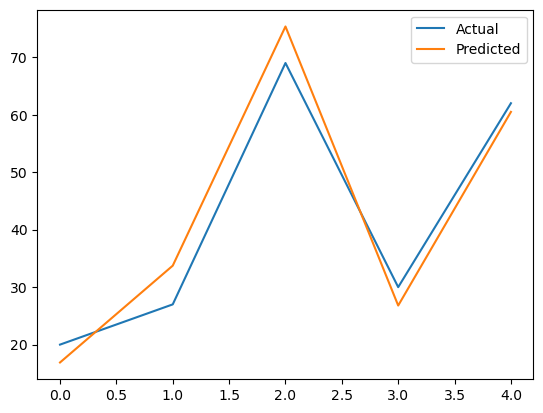

In [152]:
df.plot()

예측값과 실제값을 꺾은선 그래프 형태로 출력